### loss Functions in classification
* Binary Class => BinarryCrossentropy
* Multi Class:
  * OneHot incoded => CategoricalCrossentropy
  * OneDimension => SparseCategoricalCrossentropy

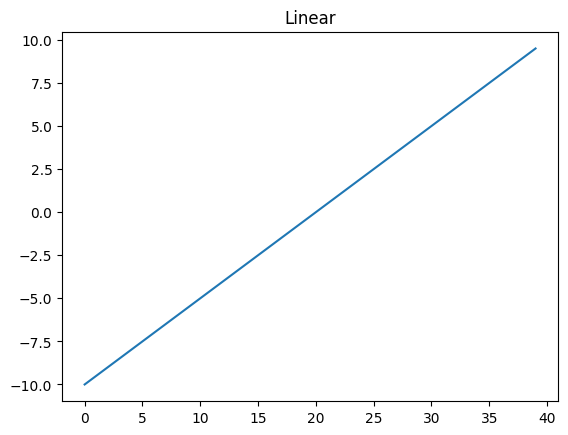

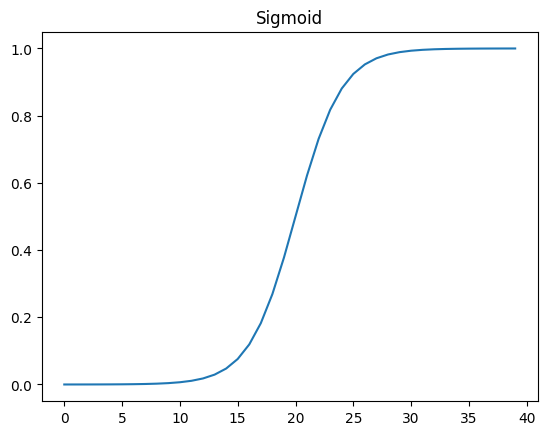

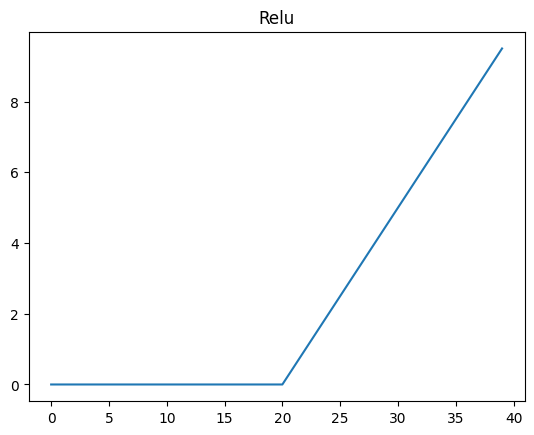

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Visualize actiavtion fncs (Linear and non Linear !)

A = tf.range(-10,10,0.5)
B = 1/(1+tf.exp(-A))
C = tf.maximum(0,A)

plt.figure()
plt.plot(A)
plt.title('Linear')

plt.figure()
plt.plot(B)
plt.title('Sigmoid')

plt.figure()
plt.plot(C)
plt.title('Relu')
plt.show()

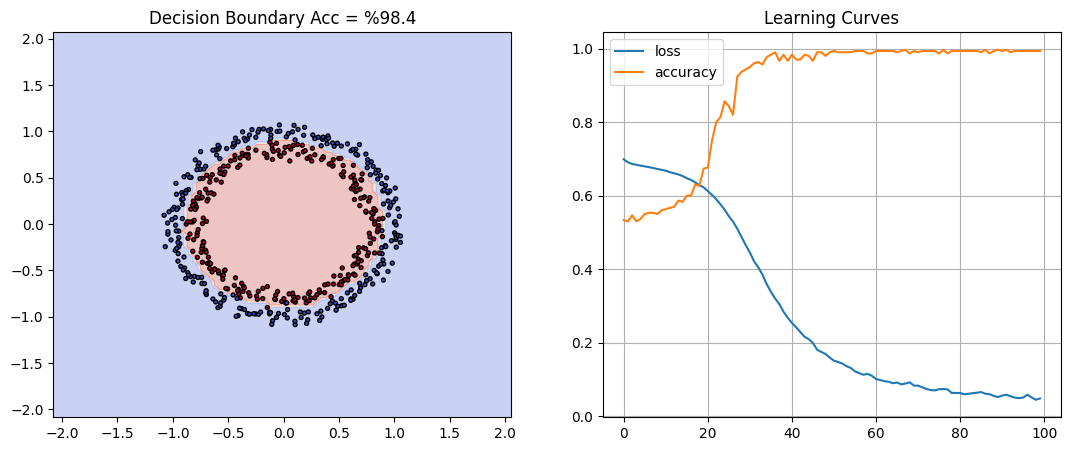

In [ ]:



X,y = make_circles(500,noise = 0.05, factor = 0.8,random_state=5)
X,y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,input_shape=(2,),activation = 'relu'),
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
              loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=100, verbose=0)

y_pred = model.predict(X, verbose=0)
y_pred = np.where(y_pred > 0.5, 1, 0)

def plot_decision_boundary(model,X,y, title = 'Decision Boundary'):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
  mesh_points = np.c_[xx.ravel(), yy.ravel()]

  mesh_predictions = model.predict(mesh_points, verbose=0)
  mesh_predictions = np.where(mesh_predictions > 0.5, 1, 0)

  plt.contourf(xx, yy, mesh_predictions.reshape(xx.shape), alpha=0.3, cmap='coolwarm')
  plt.scatter(X.T[0], X.T[1], c=y, edgecolors='k', cmap='coolwarm', s=8)

  y_pred = model.predict(X, verbose=0)
  y_pred = np.where(y_pred > 0.5, 1, 0)
  model_acc = accuracy_score(y,y_pred)
  plt.title(f'{title} Acc = %{model_acc*100:.1f}')

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plot_decision_boundary(model,X,y)

plt.subplot(1,2,2)

results = pd.DataFrame(history.history)
plt.plot(results,label = results.columns)
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

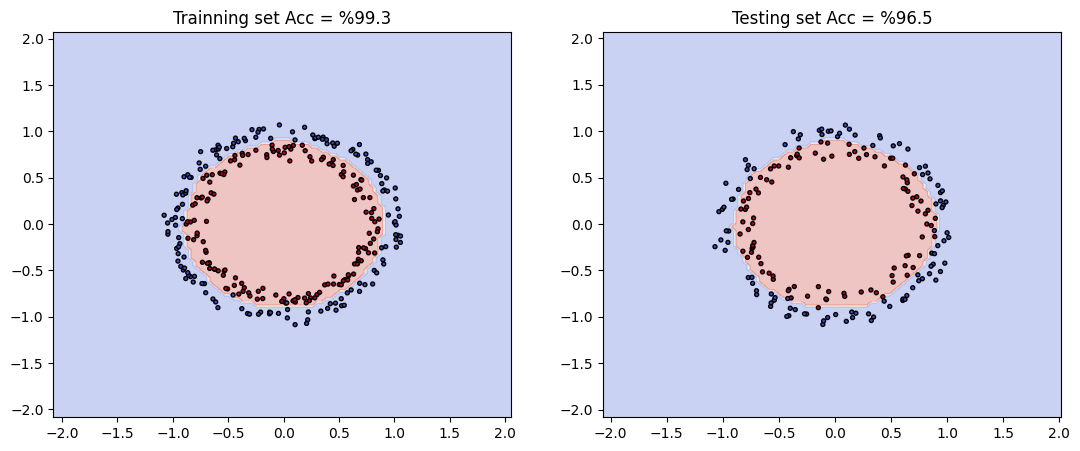

In [ ]:
plt.figure(figsize=(13, 5))

plt.subplot(1,2,1)
plot_decision_boundary(model,X_train,y_train, title = 'Trainning set')

plt.subplot(1,2,2)
plot_decision_boundary(model,X_test,y_test, title = 'Testing set')

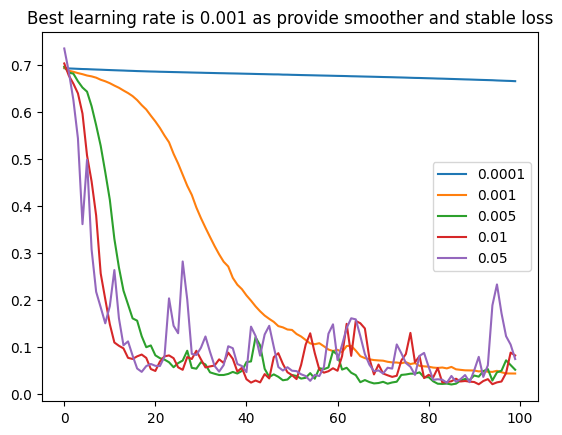

In [ ]:
# Finding ideal learning rate using loss curves...
def find_loss(lr):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100,input_shape=(2,),activation = 'relu'),
      tf.keras.layers.Dense(50,activation = 'relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  model.compile(
                loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(learning_rate=lr),
                metrics=['accuracy'])
  history = model.fit(X_train,y_train, epochs=100, verbose=0)
  return history.history['loss']

learning_rates = [0.0001,0.001,0.005,0.01,0.05]

results = {}
for lr in learning_rates:
  results[lr] = find_loss(lr)

results = pd.DataFrame(results)
ax = results.plot()
ax.set_title('Best learning rate is 0.001 as provide smoother and stable loss')
plt.show()

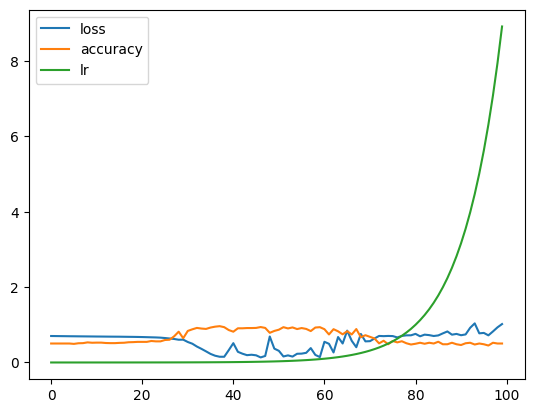

In [ ]:
# using callbacks to modify hyperparameter during training..

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,input_shape=(2,),activation = 'relu'),
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
              loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

ls_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history = model.fit(X_train,y_train, epochs=100, verbose =0,callbacks=[ls_scheduler])

pd.DataFrame(history.history).plot() # Learning Rate decay curve !
plt.show()

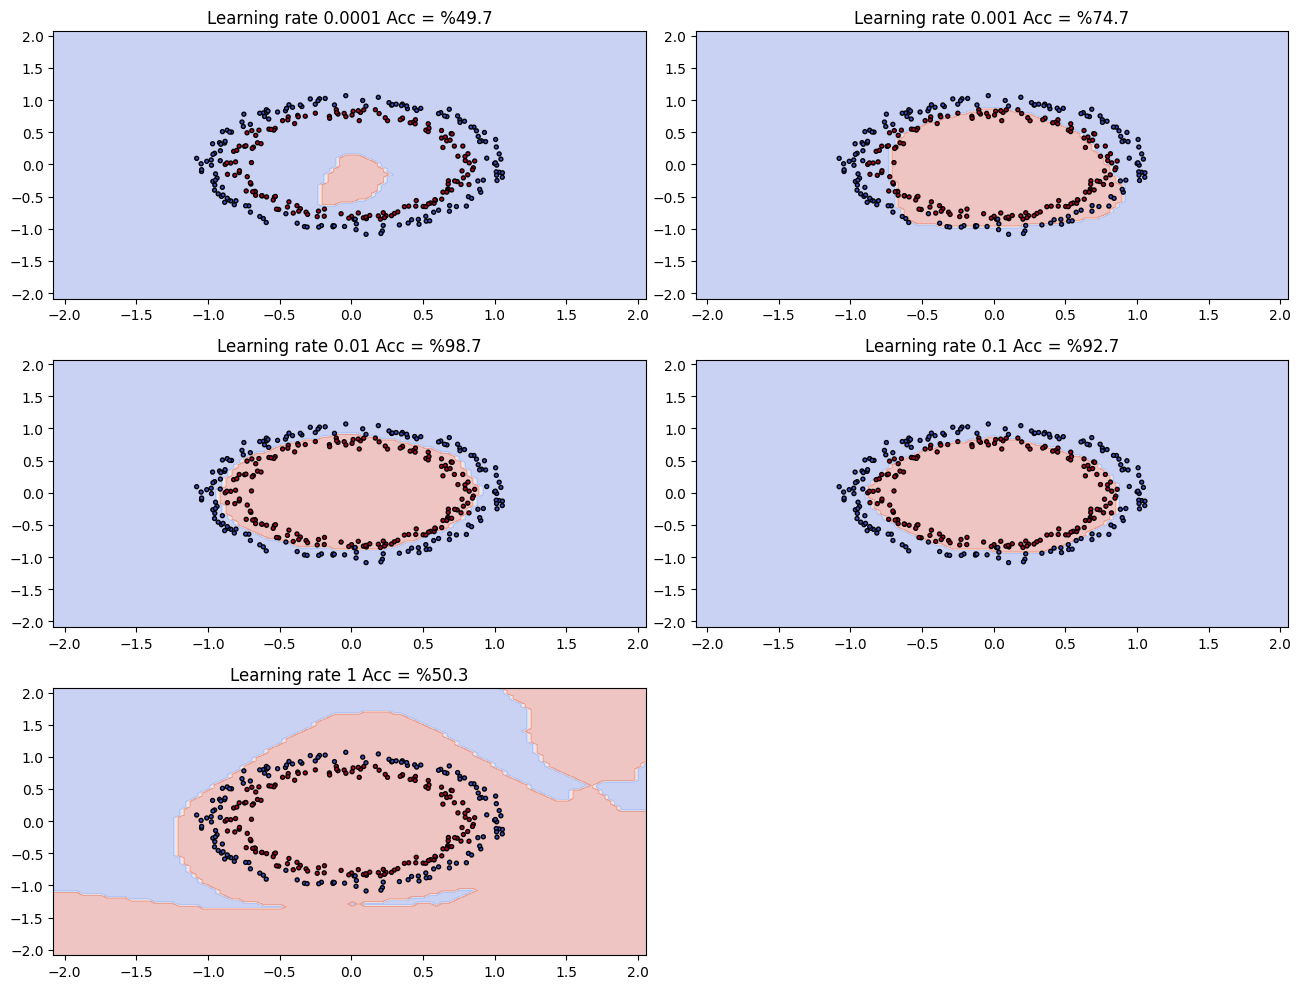

In [ ]:
def model_train(lr = 0.001):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100,input_shape=(2,),activation = 'relu'),
      tf.keras.layers.Dense(50,activation = 'relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  model.compile(
                loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(learning_rate=lr),
                metrics=['accuracy'])

  ls_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
  model.fit(X_train,y_train, epochs=20, verbose =0)
  return model

model_0 = model_train(lr = 0.0001)
model_1 = model_train(lr = 0.001)
model_2 = model_train(lr = 0.01)
model_3 = model_train(lr = 0.1)
model_4 = model_train(lr = 1)

plt.figure(figsize=(13, 10))

plt.subplot(3,2,1)
plot_decision_boundary(model_0,X_train,y_train, title = 'Learning rate 0.0001')

plt.subplot(3,2,2)
plot_decision_boundary(model_1,X_train,y_train, title = 'Learning rate 0.001')

plt.subplot(3,2,3)
plot_decision_boundary(model_2,X_train,y_train, title = 'Learning rate 0.01')

plt.subplot(3,2,4)
plot_decision_boundary(model_3,X_train,y_train, title = 'Learning rate 0.1')

plt.subplot(3,2,5)
plot_decision_boundary(model_4,X_train,y_train, title = 'Learning rate 1')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = tf.round(model_2.predict(X_test,verbose=0))

print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       101
           1       0.99      0.94      0.96        99

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



array([[100,   1],
       [  6,  93]])

### MultiClass classification...

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype("float32")
y_train = y_train.astype("float32")
x_test = x_test.astype("float32")
y_test = y_test.astype("float32")

data_labels ={
  0:'T-shirt/top',
  1:'Trouser',
  2:'Pullover',
  3:'Dress',
  4:'Coat',
  5:'Sandal',
  6:'Shirt',
  7:'Sneaker',
  8:'Bag',
  9:'Ankle boot'}

4422102/4422102 [==============================] - 0s 0us/step


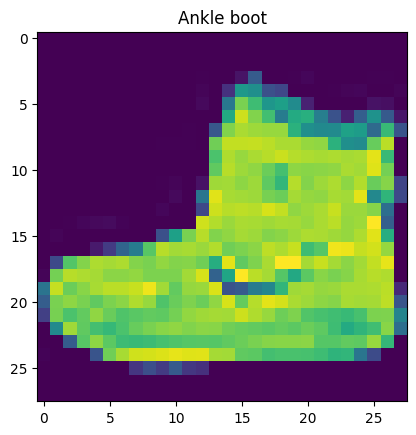

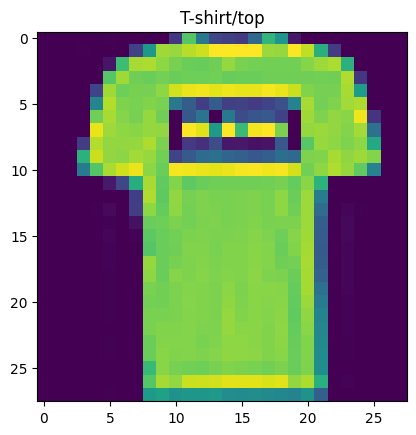

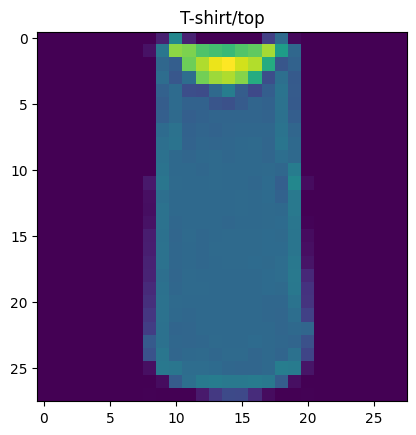

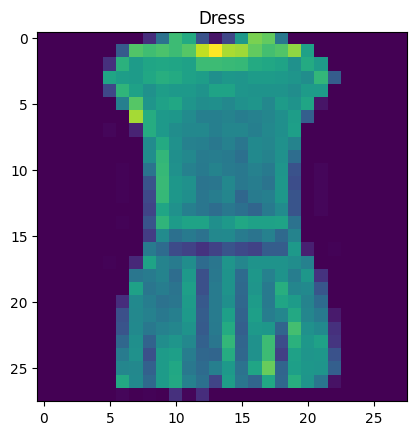

In [ ]:
# Exploring imgs and labels
for img in range(0,4):
  plt.figure()
  plt.imshow(x_train[img])
  plt.title(data_labels[y_train[img]])

#### Model 1:
* Prety basic and simple

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.7773 - accuracy: 0.2149
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7054 - accuracy: 0.3309
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3821 - accuracy: 0.4113
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3162 - accuracy: 0.4338
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2636 - accuracy: 0.4610


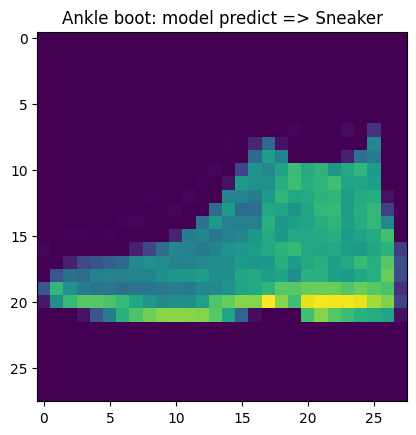

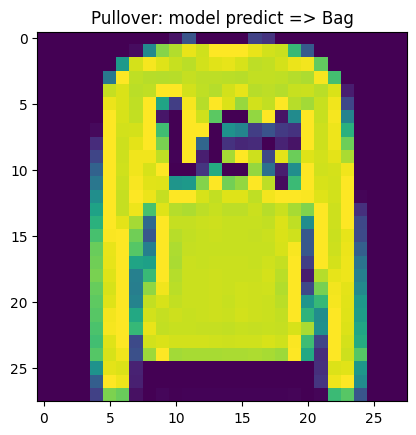

In [ ]:
# Flatten, Encoding the inputs
x_train_flat = tf.reshape(x_train,[x_train.shape[0],-1])
y_train_encoded = pd.get_dummies(tf.reshape(y_train,[-1]))
x_test_flat = tf.reshape(x_test,[x_test.shape[0],-1])
y_test_encoded = pd.get_dummies(tf.reshape(y_test,[-1]))


def display_wrong(y_test,y_pred,num = 5):
  """
  A Function to display wrong predictions
  """
  wrong_predictions = np.where(y_test != y_pred)[0]
  for img in wrong_predictions[0:num]:
    predict = data_labels[y_pred[img].numpy()]
    actual = data_labels[y_test[img]]
    if predict == actual:
      pass
    else:
      plt.figure()
      plt.imshow(x_test[img])
      plt.title(f'{actual}: model predict => {predict}')

# Model 1
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1,input_shape=(28*28,)),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model_1.fit(x_train_flat,y_train_encoded,epochs=5)

results = {}
results['model_1'] = history.history['accuracy']
y_pred = tf.argmax(model_1.predict(x_test_flat,verbose=0),axis=1)
display_wrong(y_test,y_pred,num = 2)

#### Model 2:
* Increase unites in the first hidden layer
* Use Relu in the first hidden layer

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.4469 - accuracy: 0.6508
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8663 - accuracy: 0.6847
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7112 - accuracy: 0.7203
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6709 - accuracy: 0.7297
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6348 - accuracy: 0.7406


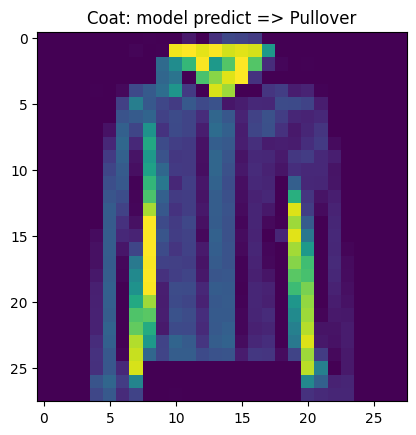

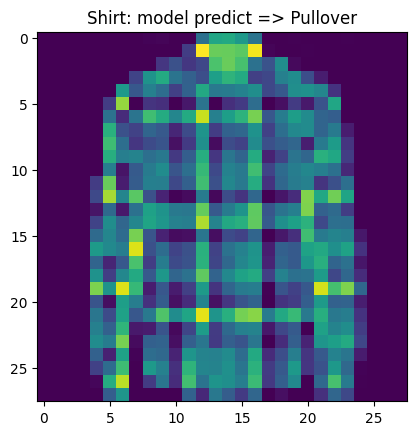

In [ ]:
# Model 2
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,input_shape=(28*28,), activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model_2.fit(x_train_flat,y_train_encoded,epochs=5)

results['more units 100'] = history.history['accuracy']
y_pred = tf.argmax(model_2.predict(x_test_flat,verbose=0),axis=1)
display_wrong(y_test,y_pred,num = 2)

#### Model 3:
* Increase layers and hidden units

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 1.0874 - accuracy: 0.7922
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4536 - accuracy: 0.8416
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4236 - accuracy: 0.8510
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3976 - accuracy: 0.8587
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3684 - accuracy: 0.8682


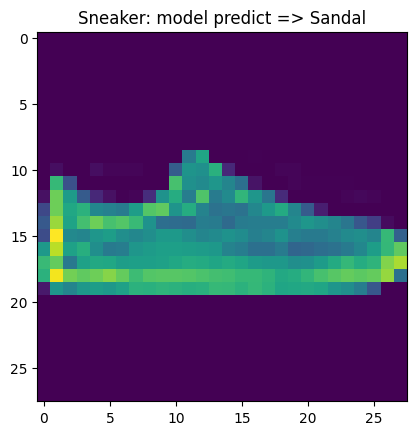

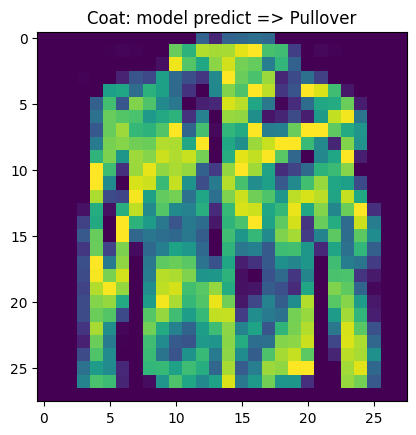

In [ ]:
# Model 3
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500,input_shape=(28*28,), activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model_3.fit(x_train_flat,y_train_encoded,epochs=5)

results['more units 1200, 4 layers'] = history.history['accuracy']
y_pred = tf.argmax(model_3.predict(x_test_flat,verbose=0),axis=1)
display_wrong(y_test,y_pred,num = 2)

#### Model 4:
* Normalize data

Epoch 1/5
1875/1875 [==============================] - 35s 17ms/step - loss: 0.4881 - accuracy: 0.8229
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3688 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3307 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3056 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2894 - accuracy: 0.8922


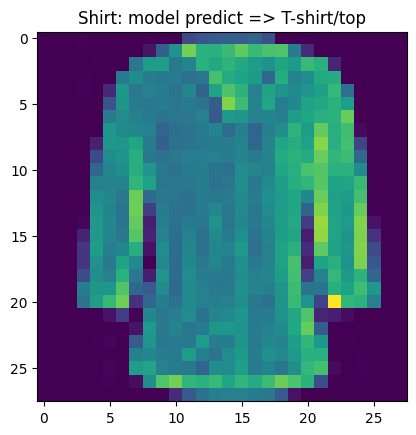

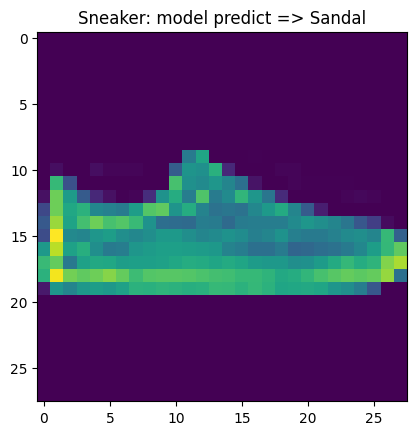

In [ ]:
# Model 4

x_train_flat_norm = x_train_flat/255
x_test_flat_norm = x_test_flat/255

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500,input_shape=(28*28,), activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model_4.fit(x_train_flat_norm,y_train_encoded,epochs=5)

results['normalize data'] = history.history['accuracy']
y_pred = tf.argmax(model_4.predict(x_test_flat_norm,verbose=0),axis=1)
display_wrong(y_test,y_pred,num = 2)

#### Model 5:
* lower learning rate

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.6513 - accuracy: 0.7715
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5342 - accuracy: 0.8190
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5235 - accuracy: 0.8239
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4769 - accuracy: 0.8337
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4798 - accuracy: 0.8378


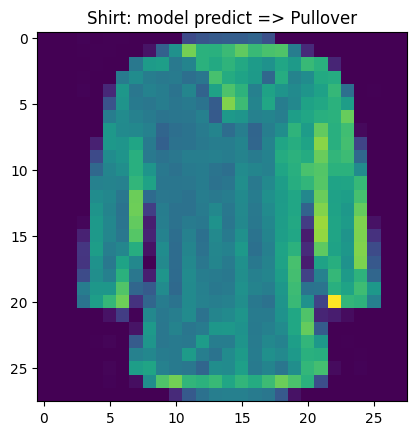

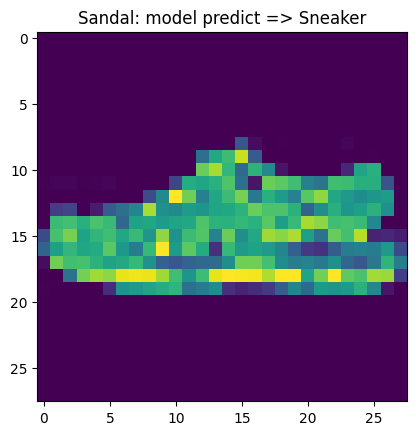

In [ ]:
# Model 5

x_train_flat_norm = x_train_flat/255
x_test_flat_norm = x_test_flat/255

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500,input_shape=(28*28,), activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model_5.fit(x_train_flat_norm,y_train_encoded,epochs=5)

results['large lr'] = history.history['accuracy']
y_pred = tf.argmax(model_5.predict(x_test_flat_norm,verbose=0),axis=1)
display_wrong(y_test,y_pred,num = 2)

In [ ]:
5+5

#### Model 6:
* longer learning

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4849 - accuracy: 0.8242 - val_loss: 0.4370 - val_accuracy: 0.8504
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3707 - accuracy: 0.8647 - val_loss: 0.3907 - val_accuracy: 0.8605
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3339 - accuracy: 0.8764 - val_loss: 0.3820 - val_accuracy: 0.8676
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3080 - accuracy: 0.8853 - val_loss: 0.3505 - val_accuracy: 0.8721
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2919 - accuracy: 0.8906 - val_loss: 0.3689 - val_accuracy: 0.8703
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2746 - accuracy: 0.8989 - val_loss: 0.3559 - val_accuracy: 0.8763
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - lo

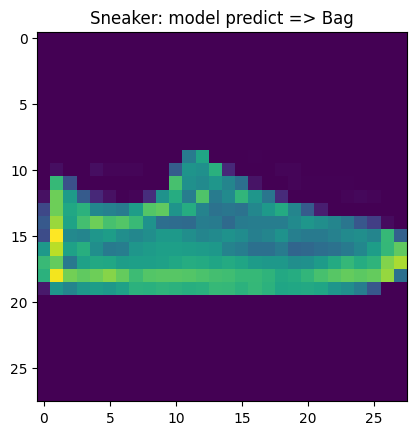

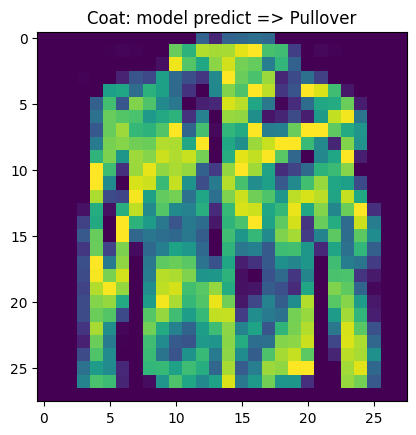

In [1]:
# Model 6
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype("float32")
y_train = y_train.astype("float32")
x_test = x_test.astype("float32")
y_test = y_test.astype("float32")

data_labels ={
  0:'T-shirt/top',
  1:'Trouser',
  2:'Pullover',
  3:'Dress',
  4:'Coat',
  5:'Sandal',
  6:'Shirt',
  7:'Sneaker',
  8:'Bag',
  9:'Ankle boot'}

# Flatten, Encoding the inputs
x_train_flat = tf.reshape(x_train,[x_train.shape[0],-1])
y_train_encoded = pd.get_dummies(tf.reshape(y_train,[-1]))
x_test_flat = tf.reshape(x_test,[x_test.shape[0],-1])
y_test_encoded = pd.get_dummies(tf.reshape(y_test,[-1]))


def display_wrong(y_test,y_pred,num = 5):
  """
  A Function to display wrong predictions
  """
  wrong_predictions = np.where(y_test != y_pred)[0]
  for img in wrong_predictions[0:num]:
    predict = data_labels[y_pred[img].numpy()]
    actual = data_labels[y_test[img]]
    if predict == actual:
      pass
    else:
      plt.figure()
      plt.imshow(x_test[img])
      plt.title(f'{actual}: model predict => {predict}')

x_train_norm = x_train/255
x_test_norm = x_test/255

model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])


model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model_6.fit(x_train_norm,y_train,epochs=10,validation_data=(x_test_norm,y_test))
results = {}
results['longer learning'] = history.history['accuracy'][-5:]
y_pred = tf.argmax(model_6.predict(x_test_norm,verbose=0),axis=1)
display_wrong(y_test,y_pred,num = 2)

In [2]:
model_6.save('predict_clothes.keras')

In [3]:
print(classification_report(y_test,y_pred,target_names = data_labels.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.84      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.84      0.77      0.80      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.80      0.85      0.82      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.72      0.71      0.72      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



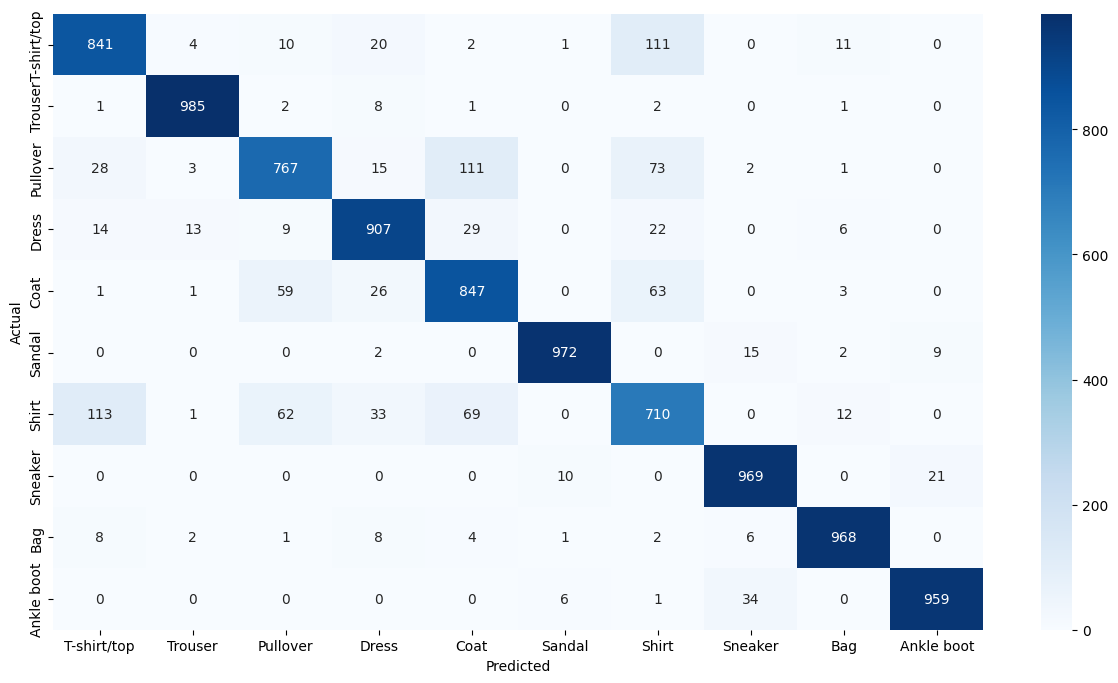

In [4]:
# Confusion Matrix gererated using ChatGPT !!

import matplotlib.pyplot as plt

# Assuming your labels are like this
class_labels = data_labels.values()

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=range(len(class_labels)))

# Display as a heatmap using seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<Axes: >

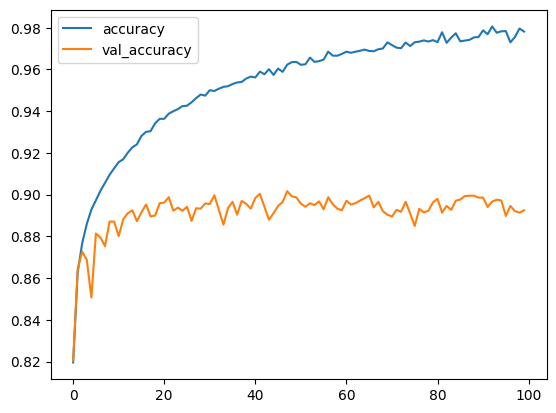

In [5]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

In [14]:
x_test_norm[0].shape

(28, 28)

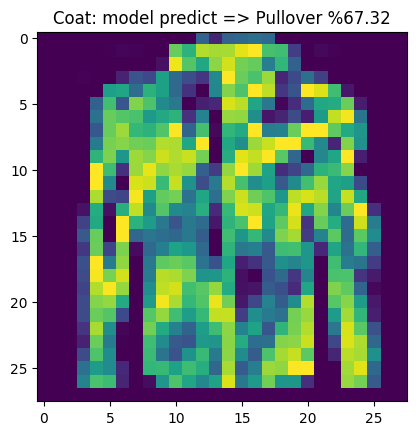

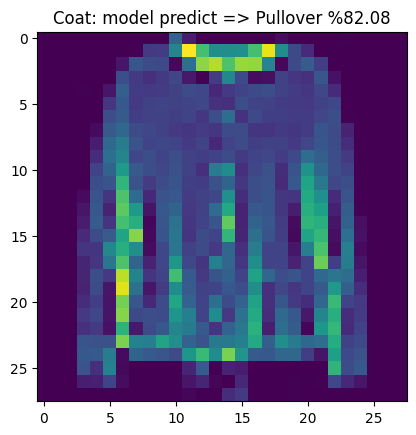

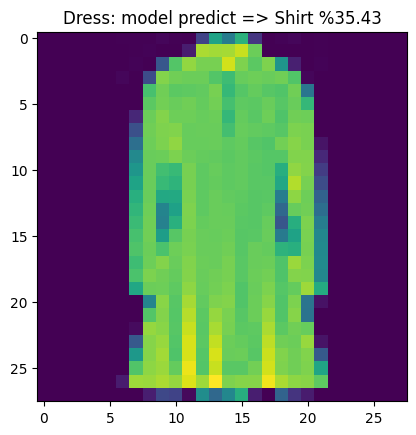

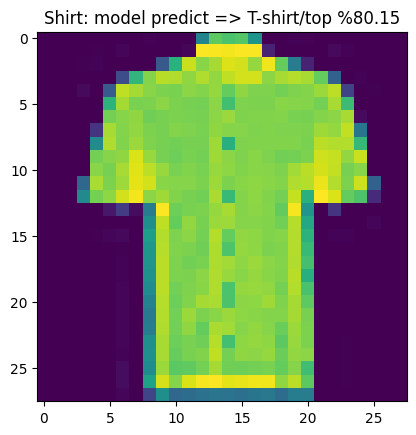

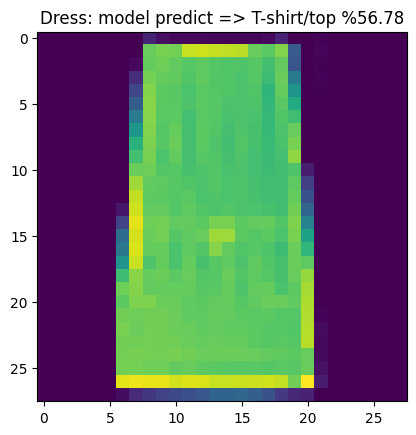

In [153]:
def display_wrong(y_test,y_pred,probabilities,num = 5):
  """
  A Function to display wrong predictions
  """
  wrong_predictions = np.where(y_test != y_pred)[0]
  for img in wrong_predictions[0:num]:
    predict = data_labels[y_pred[img].numpy()]
    actual = data_labels[y_test[img]]
    if predict == actual:
      pass
    else:
      plt.figure()
      plt.imshow(x_test[img])
      plt.title(f'{actual}: model predict => {predict} %{probabilities[img]:.2f}')

y_pred = tf.argmax(model_6.predict(x_test_norm,verbose=0),axis=1)

predictions = model_6.predict(x_test_norm,verbose=0)
probabilities = list(map(lambda x:max(x),predictions*100))

display_wrong(y_test,y_pred,probabilities,num = 5)




In [8]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 400)               200400    
                                                                 
 dense_2 (Dense)             (None, 200)               80200     
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 694210 (2.65 MB)
Trainable params: 694210 

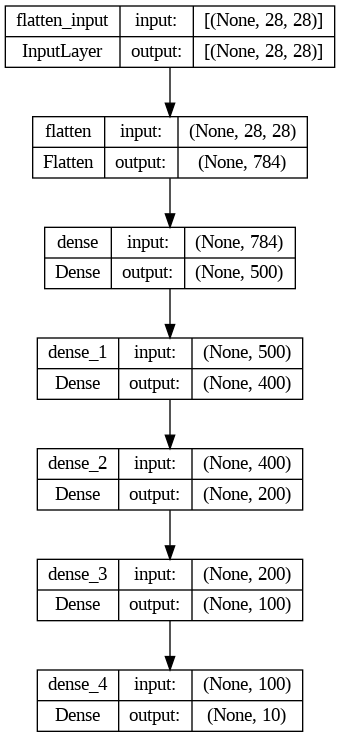

In [18]:
# Get a pettern (weights and biases) in a layers
weights, biases = model_6.layers[1].get_weights()
weights.T[0].shape

# weights initialized randomly (kernal_initializer) => affect each input in the activation function individually
# biases initialized as zeros (bias_initializer) => bias affect how much will influnuce the all values exiting to the next layer

tf.keras.utils.plot_model(model_6, show_shapes=True)